# Check AWB Locking


RG std/mean: 2.5513%
BG std/mean: 1.2773%


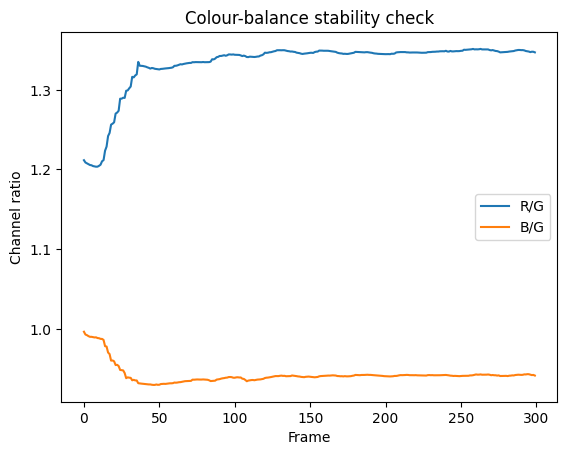

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Load your file  (shape ≈ (T, H, W, 3); OpenCV-saved videos will be BGR)
frames = np.load("/Users/henryschnieders/Documents/Research/My_Data/testagain6_9_wholeface.npy", allow_pickle=True)


R_mean, G_mean, B_mean = [], [], []

for f in frames:                         # f is an (H,W,3) array for that frame
    f = f.astype(np.float32)             # (keep precision)
    B, G, R = f[..., 0], f[..., 1], f[..., 2]
    R_mean.append(R.mean())
    G_mean.append(G.mean())
    B_mean.append(B.mean())

R_mean = np.asarray(R_mean)
G_mean = np.asarray(G_mean)
B_mean = np.asarray(B_mean)

# 2. Channel ratios
eps = 1e-6
RG = R_mean / (G_mean + eps)
BG = B_mean / (G_mean + eps)

# 3. Quick stats
print(f"RG std/mean: {RG.std()/RG.mean():.4%}")
print(f"BG std/mean: {BG.std()/BG.mean():.4%}")

# 4. Plot
plt.figure()
plt.plot(RG, label='R/G')
plt.plot(BG, label='B/G')
plt.xlabel('Frame')
plt.ylabel('Channel ratio')
plt.legend()
plt.title('Colour-balance stability check')
plt.show()


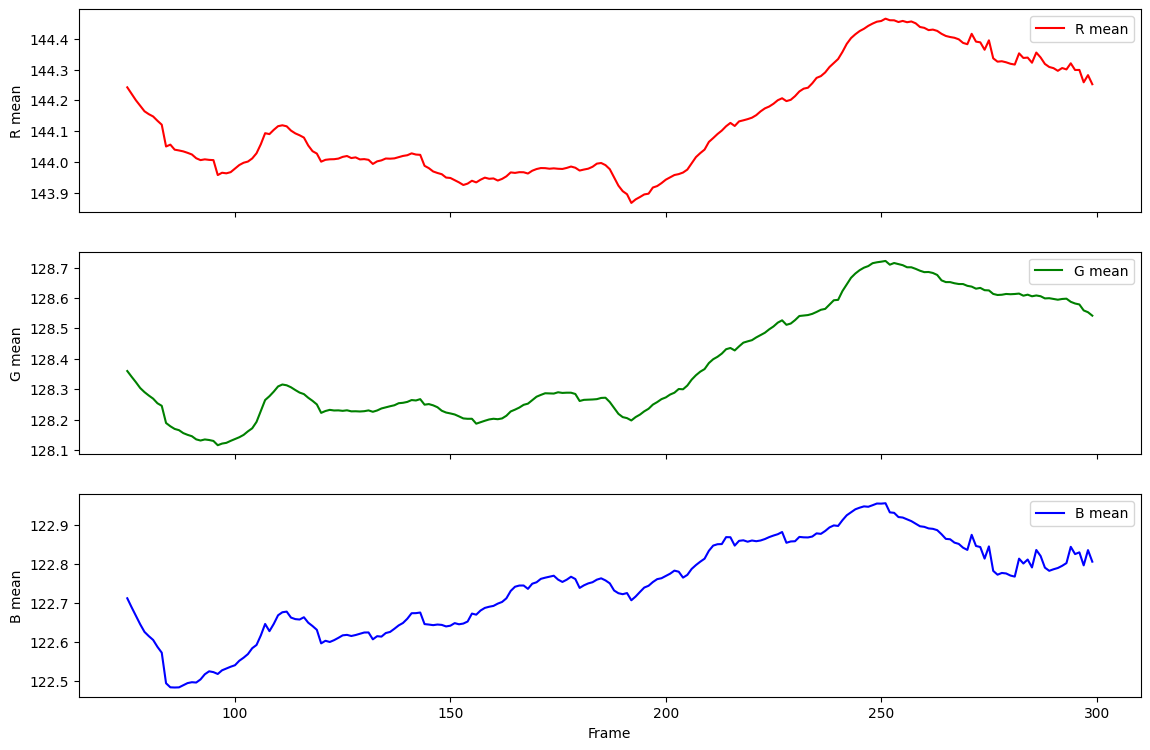

In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

# load your data
data = pd.read_csv('/Users/henryschnieders/Documents/Research/My_Data/testagain6_9_awb_gains.csv')

# keep only frames ≥ 30
fdata = data[data['frame'] >= 75]

# set up 3 vertical plots, share x-axis
fig, axes = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

axes[0].plot(fdata['frame'], fdata['R_mean'], color='red', label='R mean')
axes[0].set_ylabel('R mean')
axes[0].legend(loc='upper right')

axes[1].plot(fdata['frame'], fdata['G_mean'], color='green', label='G mean')
axes[1].set_ylabel('G mean')
axes[1].legend(loc='upper right')

axes[2].plot(fdata['frame'], fdata['B_mean'], color='blue', label='B mean')
axes[2].set_ylabel('B mean')
axes[2].set_xlabel('Frame')
axes[2].legend(loc='upper right')

plt.tight_layout(pad=2.5)
plt.show()


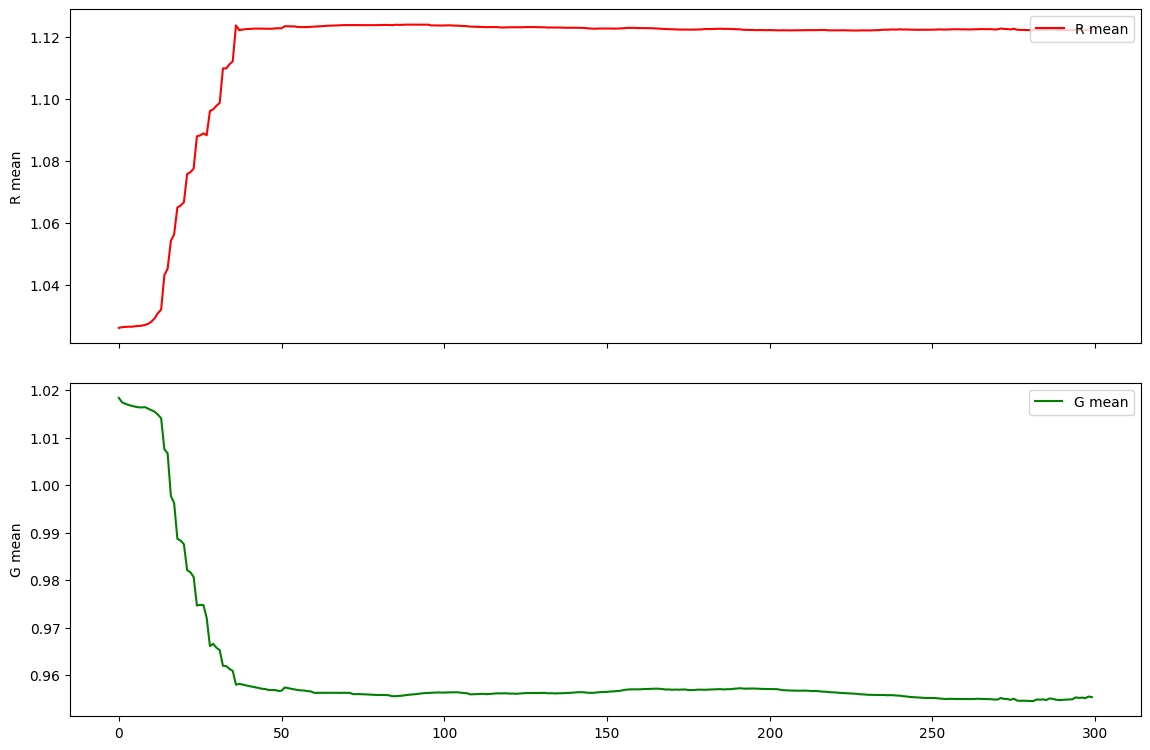

In [14]:
# keep only frames ≥ 30
fdata = data[data['frame'] >=0]

# set up 3 vertical plots, share x-axis
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

axes[0].plot(fdata['frame'], fdata['R_over_G'], color='red', label='R mean')
axes[0].set_ylabel('R mean')
axes[0].legend(loc='upper right')

axes[1].plot(fdata['frame'], fdata['B_over_G'], color='green', label='G mean')
axes[1].set_ylabel('G mean')
axes[1].legend(loc='upper right')

plt.tight_layout(pad=2.5)
plt.show()
